#### MNIST training with different hidden layer size

In this exercise we will see how the hidden layer size affects on the test accuracy and test loss of a MNIST  Deep Neural Network classifier.

Use matplotlib to plot the test accuracy vs sizes and test loss vs sizes

You should be able to complete this using the MNIST classifier we built in the last meeting.

In [1]:
# import functions:
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Flatten, Reshape
from keras.models import Model
from keras.models import Sequential
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

C:\Users\ktnng\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# write a function to construct model with hidden layer defined by the size function
def make_model(size):
    model = Sequential()
    model.add(Reshape((784,), input_shape=(28,28)))
    #Add code here:
    model.add(Dense(size, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    return model

In [3]:
sizes = [256,512,784,1024] # create a list of sizes you want to experiment with
test_loss = [] # create array to store  test loss 
test_accuracy = [] # create array to store test accuracy

In [4]:
# load MNIST data:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
#x_train = x_train.reshape(x_train.shape[0],28,28,1)
#x_test = x_test.reshape(x_test.shape[0],28,28,1)

# convert the range of values of train and test images from 0 to 255 to 0 to 1:
x_train = x_train.astype('float64')/255
x_test = x_test.astype('float64')/255

# use to_categorical to convert integer labels to logits:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

4423680/4422102 [==============================] - 15s 3us/step


In [7]:
for size in sizes:
    print("Size: ", size)
    my_model = make_model(size)
    # compile model  with optimizer='sgd' loss='categorical_crossentropy'  metrics=['accuracy']):
    my_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
    # fit model with  epochs=10, batch_size=64:
    history = my_model.fit(x_train, y_train, epochs=10, shuffle='batch',batch_size=64)
    # evaluate model to get test loss and test accuracy:
    t_loss, t_accuracy = my_model.evaluate(x_test,y_test)
    print("Test Accuracy ", t_accuracy)
    print("Test Loss ",t_loss)
    # append the test loss and test accuracy to the arrays we created earlier:
    test_loss.append(t_loss)
    test_accuracy.append(t_accuracy)

Size:  256
Epoch 1/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.8488 - acc: 0.7375
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.5686 - acc: 0.8130
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.5128 - acc: 0.8279
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.4824 - acc: 0.8353
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.4632 - acc: 0.8415
Epoch 6/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.4479 - acc: 0.8467
Epoch 7/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.4356 - acc: 0.8508
Epoch 8/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.4259 - acc: 0.8540
Epoch 9/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.4169 - acc: 0.8563
Epoch 10/10
10000/10000 [==============================] - 1s 80us/step
Test Accurac

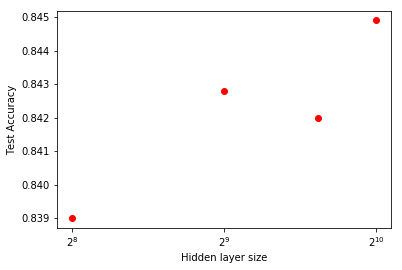

In [8]:
plt.figure()
plt.xscale('log', basex=2)
plt.ylabel('Test Accuracy')
plt.xlabel('Hidden layer size')
plt.plot(sizes, test_accuracy, 'ro')

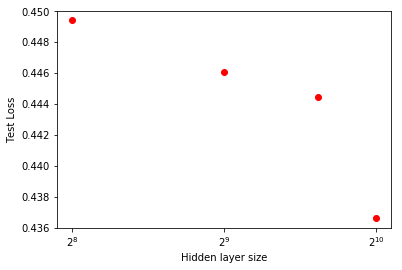

In [9]:
plt.figure()
plt.xscale('log', basex=2)
plt.ylabel('Test Loss')
plt.xlabel('Hidden layer size')
plt.plot(sizes, test_loss, 'ro')